In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

## A1. Models


In [9]:
CMIP5ds = xr.open_dataset('Data/CMIP5_time_series_smoothed.nc')
CMIP6ds = xr.open_dataset('Data/CMIP6_time_series_smoothed.nc')

In [10]:
# For these models, make list with True / False if they have data available for zos, GSAT, GMTSL, AMOC35
zos_array5      = CMIP5ds.zos.mean(dim=['scenario','time']).notnull()
GSAT_array5     = CMIP5ds.GSAT.mean(dim=['scenario','time']).notnull()
GMTSL_array5    = CMIP5ds.GMTSL.mean(dim=['scenario','time']).notnull()
AMOC35_array5   = CMIP5ds.AMOC35.mean(dim=['scenario','time']).notnull()

zos_array6      = CMIP6ds.zos.mean(dim=['scenario','time']).notnull()
GSAT_array6     = CMIP6ds.GSAT.mean(dim=['scenario','time']).notnull()
GMTSL_array6    = CMIP6ds.GMTSL.mean(dim=['scenario','time']).notnull()
AMOC35_array6   = CMIP6ds.AMOC35.mean(dim=['scenario','time']).notnull()

d5 = {'Models': CMIP5ds.model.values, 'zos': zos_array5, 'GSAT': GSAT_array5, 'GMTSL': GMTSL_array5, 'AMOC35': AMOC35_array5}
df5 = pd.DataFrame(data=d5)

d6 = {'Models': CMIP6ds.model.values, 'zos': zos_array6, 'GSAT': GSAT_array6, 'GMTSL': GMTSL_array6, 'AMOC35': AMOC35_array6}
df6 = pd.DataFrame(data=d6)

In [11]:
df5

Models   zos   GSAT  GMTSL  AMOC35
0        ACCESS1-0  True   True   True    True
1            CCSM4  True   True   True    True
2        CMCC-CESM  True  False   True   False
3          CMCC-CM  True   True   True    True
4         CMCC-CMS  True   True   True    True
5         CNRM-CM5  True   True   True    True
6    CSIRO-Mk3-6-0  True   True   True    True
7          CanESM2  True   True   True    True
8         EC-EARTH  True   True  False    True
9         GFDL-CM3  True   True  False   False
10      GFDL-ESM2G  True   True  False    True
11      GFDL-ESM2M  True   True  False    True
12       GISS-E2-R  True   True   True    True
13    GISS-E2-R-CC  True  False   True   False
14      HadGEM2-CC  True   True   True    True
15      HadGEM2-ES  True   True   True    True
16    IPSL-CM5A-LR  True   True   True    True
17    IPSL-CM5A-MR  True   True   True    True
18    IPSL-CM5B-LR  True   True  False    True
19       MIROC-ESM  True   True   True   False
20  MIROC-ESM-CHEM  True   True   True   False
21          MIROC5  True   True   True    True
22      MPI-ESM-LR  True   True   True    True
23      MPI-ESM-MR  True   True   True    True
24       MRI-CGCM3  True   True   True    True
25       NorESM1-M  True   True   True    True
26      NorESM1-ME  True   True   True    True
27      bcc-csm1-1  True   True   True    True
28    bcc-csm1-1-m  True   True   True    True
29          inmcm4  True   True   True   False

In [12]:
df6

Models   zos   GSAT  GMTSL  AMOC35
0         ACCESS-CM2  True   True   True    True
1      ACCESS-ESM1-5  True   True   True    True
2        BCC-CSM2-MR  True   True  False    True
3        CAMS-CSM1-0  True   True  False    True
4         CAS-ESM2-0  True  False  False   False
5              CESM2  True   True  False   False
6        CESM2-WACCM  True   True  False    True
7              CIESM  True   True  False   False
8       CMCC-CM2-SR5  True   True   True    True
9          CMCC-ESM2  True  False  False    True
10        CNRM-CM6-1  True   True   True    True
11       CNRM-ESM2-1  True   True   True    True
12           CanESM5  True   True   True    True
13     CanESM5-CanOE  True   True   True    True
14          E3SM-1-1  True  False  False   False
15         EC-Earth3  True   True   True    True
16      EC-Earth3-CC  True  False  False   False
17     EC-Earth3-Veg  True   True   True    True
18  EC-Earth3-Veg-LR  True  False  False   False
19         FGOALS-g3  True   True  False    True
20          GFDL-CM4  True  False  False    True
21         GFDL-ESM4  True   True  False    True
22       GISS-E2-1-G  True   True  False   False
23   HadGEM3-GC31-LL  True   True   True   False
24   HadGEM3-GC31-MM  True   True  False   False
25         INM-CM4-8  True   True   True    True
26         INM-CM5-0  True   True   True    True
27      IPSL-CM6A-LR  True   True   True    True
28        MIROC-ES2L  True   True  False   False
29            MIROC6  True   True   True    True
30     MPI-ESM1-2-HR  True   True   True    True
31     MPI-ESM1-2-LR  True   True   True    True
32        MRI-ESM2-0  True   True   True    True
33             NESM3  True   True  False    True
34        NorESM2-LM  True   True   True    True
35        NorESM2-MM  True   True   True    True
36           TaiESM1  True  False  False   False
37       UKESM1-0-LL  True   True   True   False

In [1]:
# Also compute which models have MLD data available.

## A3. Correlation GSAT - AMOC
Here, we compute the correlation between GSAT and AMOC for all models. 

(-1.0, 0.0)

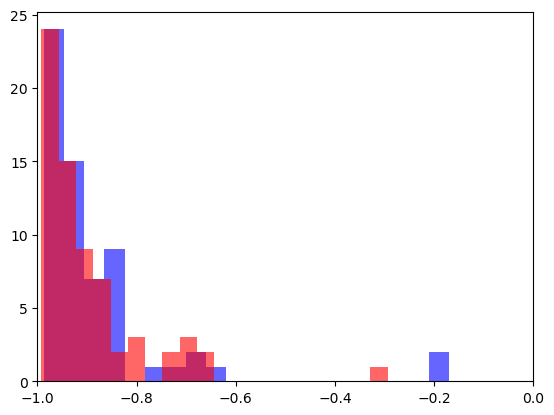

In [26]:
# Compute correlation for every model in each scenario
rs = []
for mods in CMIP5ds.model.values:
    CMIP5_mod = CMIP5ds.sel(model=mods)

    for scen in CMIP5ds.scenario.values:
        CMIP5_mod_sce = CMIP5_mod.sel(scenario=scen)
        
        GSAT = CMIP5_mod_sce.GSAT.values
        AMOC = CMIP5_mod_sce.AMOC35.values

        r_matrix = np.corrcoef(GSAT, AMOC)
        r = r_matrix[0,1]

        rs.append(r)

plt.hist(rs,20,color='b',alpha=0.6);

rs = []
for mods in CMIP6ds.model.values:
    CMIP6_mod = CMIP6ds.sel(model=mods)

    for scen in CMIP6ds.scenario.values:
        CMIP6_mod_sce = CMIP6_mod.sel(scenario=scen)
        
        GSAT = CMIP6_mod_sce.GSAT.values
        AMOC = CMIP6_mod_sce.AMOC35.values

        r_matrix = np.corrcoef(GSAT, AMOC)
        r = r_matrix[0,1]

        rs.append(r)

plt.hist(rs,20,color='r',alpha=0.6);
plt.xlim(-1,0)

## A4. Influence of smoothing window
In our study, we use a smoothing window of 25 years since we are interested in long-term changes. 

In 1_Linear_regression.ipynb we calculate the regression with regressors GSAT and AMOC35 also for the unsmoothed time series, and time series smoothed with a 10 year window.

Here, we compare the results. 

In [3]:
CMIP5ds_0yr = xr.open_dataset('Data/CMIP5_time_series.nc')
CMIP6ds_0yr = xr.open_dataset('Data/CMIP6_time_series.nc')

CMIP5ds_10yr = xr.open_dataset('Data/CMIP5_time_series_smoothed_10yr.nc')
CMIP6ds_10yr = xr.open_dataset('Data/CMIP6_time_series_smoothed_10yr.nc')

CMIP5ds_25yr = xr.open_dataset('Data/CMIP5_time_series_smoothed.nc')
CMIP6ds_25yr = xr.open_dataset('Data/CMIP6_time_series_smoothed.nc')

In [7]:
def select_models(ds, varx1, vary, check, varx2=None):
    '''
    Check is either 'model', or 'scenario'
    Find models for which both variables (varx1, vary) are available
    Input is an xarray dataset (CMIP5ds, CMIP5ds_LF, CMIP6ds, CMIP6ds_LF). 
    If you want to check the scenarios per model, already select the model in the input: eg. CMIP5ds.sel(model=mod)
    It returns the model/sce names of models/sces that have data for all three variables and returns the new dataset.
    '''
    x1 = ds[varx1].dropna(check,'all')[check].values
    y = ds[vary].dropna(check,'all')[check].values
    
    if varx2 == None:
        check_list = np.sort(list(set(x1)&set(y)))

    if varx2 is not None:
        x2 = ds[varx2].dropna(check,'all')[check].values
        check_list = np.sort(list(set(x1)&set(x2)&set(y)))
    
    if check == 'model':
        ds_new = ds.sel(model=check_list)
        
    elif check == 'scenario':
        ds_new = ds.sel(scenario=check_list)
    
    return check_list, ds_new

In [8]:
def plot_LR_results_multi(ds, varx1, varx2, cmip, LR_result, save=None):
    
    ds = select_models(ds, varx1, 'zos', 'model', varx2)[1]

    nrows = int(np.round(len(LR_result)/4+.499))
    ncols = 4

    # ========================== #
    ### Plot individual models ###
    # ========================== #
    fig, ax = plt.subplots(nrows, ncols, figsize = (20, nrows*3.5),sharex=True,sharey=True)
    ax = ax.ravel()

    Models = LR_result.index.values

    ODSL_mods, ODSL_fits, ODSL_alph, ODSL_beta1, ODSL_beta2 = [],[],[],[],[]
    
    for i, mod_name in enumerate(Models):
        sces_in_mod = select_models(ds.sel(model=mod_name), varx1, 'zos', 'scenario', varx2)[0]
        ds_mod = ds.sel(model = mod_name)
        
        if cmip == 'CMIP5':
            end_hist = 2005
            nan_num = 95
            sce_names = ['rcp26','rcp45','rcp85']
            
        elif cmip == 'CMIP6':
            end_hist = 2014
            nan_num = 86
            sce_names = ['ssp126','ssp245','ssp585']
        
        pars = LR_result.loc[mod_name]

        ds_hist = ds_mod.sel(time=slice(1900,end_hist), scenario=sces_in_mod[0])  # select historical period for one sce
        ds_sces = ds_mod.sel(time=slice(end_hist,2100))                          # select future period for all sces

        ODSL_mod, varx1_mod, varx2_mod = ds_hist['zos'].values, ds_hist[varx1].values, ds_hist[varx2].values

        for sce in sce_names:        
                ds_sce = ds_sces.sel(scenario=sce)
            
                zos = ds_sce.zos.values
                varx1_list = ds_sce[varx1].values
                varx2_list = ds_sce[varx2].values

                if(np.isnan(zos).any()) or (np.isnan(varx1_list).any()):
                    ODSL_mod = np.append(ODSL_mod, np.ones(nan_num)*np.nan)
                    varx1_mod = np.append(varx1_mod, np.ones(nan_num)*np.nan)
                    varx2_mod = np.append(varx2_mod, np.ones(nan_num)*np.nan)
                else:
                    ODSL_mod = np.append(ODSL_mod, zos)
                    varx1_mod = np.append(varx1_mod, varx1_list)
                    varx2_mod = np.append(varx2_mod, varx2_list)

        ODSL_fit = pars['alpha'] + pars['beta1'] * varx1_mod + pars['beta2'] * varx2_mod
        
        ODSL_mods.append(ODSL_mod)
        ODSL_fits.append(ODSL_fit)
        ODSL_alph.append(ODSL_fit - pars['beta1'] * varx1_mod - pars['beta2'] * varx2_mod)
        ODSL_beta1.append(pars['beta1']*varx1_mod)
        ODSL_beta2.append(pars['beta2']*varx2_mod)

        ax[i].plot(ODSL_mod, label='CMIP Data')
        ax[i].plot(ODSL_fit - pars['beta1'] * varx1_mod - pars['beta2'] * varx2_mod, c='g',label=r'$\alpha$')
        ax[i].plot(pars['beta1'] * varx1_mod, c='k',label=r'$\beta_1 \times$'f'{varx1}')
        ax[i].plot(pars['beta2'] * varx2_mod, c='orange',label=r'$\beta_2 \times$'f'{varx2}')
        ax[i].plot(ODSL_fit, label='Regression Model', c='r')
        
        if i % 4 == 0:
            ax[i].set_ylabel('ODSL anomaly (cm)', fontsize = 15)        
        ax[i].tick_params(axis='x', labelsize=14)
        ax[i].tick_params(axis='y', labelsize=15)
    
        if cmip == 'CMIP5':
            ax[i].set_xticks([0, 105, 200,295], ["Historic", "RCP2.6", "RCP4.5",'RCP8.5'],  horizontalalignment='left')
        elif cmip == 'CMIP6':
            ax[i].set_xticks([0, 114, 200,286], ["Historic", "SSP1-2.6", "SSP2-4.5",'SSP5-8.5'],  horizontalalignment='left')
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        textstr = r'$\alpha$' f' = {pars.alpha:.2f} \n' r'$\beta_1$' f' = {pars.beta1:.2f} \n' r'$\beta_2$' f' = {pars.beta2:.2f}'
        if i == 0:
            ax[i].text(0.75, 0.95, textstr, transform=ax[i].transAxes, fontsize=14, verticalalignment='top', bbox=props)
            ax[i].legend(loc='upper left',fontsize=14)
        else:
            ax[i].text(0.05, 0.95, textstr, transform=ax[i].transAxes, fontsize=14, verticalalignment='top', bbox=props)
        
        ax[i].set_ylim([-10,50])
        ax[i].set_title(f'{mod_name} \n 'r'R$^2$'f'-score: {pars[1]:.2f}, RMSE: {pars.mse:.2f} cm', fontsize=16)
        ax[i].grid(True, alpha=0.3)
    
    for j in range(len(Models), ncols*nrows):
            ax[j].axis("off")
    
    for j in range(len(Models)-ncols, len(Models)):
        if cmip == 'CMIP5':
            ax[j].xaxis.set_tick_params(labelbottom=True, labelcolor="k")
            ax[j].set_xlabel('Time', fontsize=15)

        if cmip == 'CMIP6':
            ax[j].xaxis.set_tick_params(labelbottom=True, labelcolor="k")
            ax[j].set_xlabel('Time', fontsize=15)

    ax[0].legend(loc='upper left',fontsize=16)
    fig.tight_layout()
    
    if save == True:
        fig.savefig(f'Figures/LR/Individual_Models_LR_{cmip}_{varx1}_{varx2}.pdf',dpi=dpi)
    elif save:
        fig.savefig(f'Figures/{save}_IM.pdf',dpi=dpi)



    # ========================= #
    ### Plot ensemble average ###
    # ========================= #
    ODSL_mods_mean = np.nanmean(np.array(ODSL_mods),axis=0)
    ODSL_fits_mean = np.nanmean(np.array(ODSL_fits),axis=0)
    ODSL_alph_mean = np.nanmean(np.array(ODSL_alph),axis=0)
    ODSL_beta1_mean = np.nanmean(np.array(ODSL_beta1),axis=0)
    ODSL_beta2_mean = np.nanmean(np.array(ODSL_beta2),axis=0)

    fig,ax = plt.subplots(1,1,figsize=(10,6))

    ax.plot(ODSL_mods_mean,                 label='CMIP Data')
    ax.plot(ODSL_alph_mean,     c='g',      label=r'$\alpha$')
    ax.plot(ODSL_beta1_mean,    c='k',      label=r'$\beta_1 \times$'f'{varx1}')
    ax.plot(ODSL_beta2_mean,    c='orange', label=r'$\beta_2 \times$'f'{varx2}')
    ax.plot(ODSL_fits_mean,     c='r',      label='Regression Model')
    
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Time', fontsize=16)
    ax.set_ylabel('ODSL change (cm)', fontsize = 16)
    ax.set_ylim([-10,40])
    ax.axvspan(0, 50, alpha=0.1, color='grey')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left',fontsize=16)
    ax.set_title(f'{cmip} ensemble average \n Average RMSE: {np.mean(LR_result.mse.values):.2f} cm', fontsize=17)

    if cmip == 'CMIP5':
        ax.set_xlim([0,390])
        ax.set_xticks([0, 105, 200,295], ["Historic", "RCP2.6", "RCP4.5",'RCP8.5'],  horizontalalignment='left')
    elif cmip =='CMIP6':
        ax.set_xlim([0,372])
        ax.set_xticks([0, 114, 200,286], ["Historic", "SSP1-2.6", "SSP2-4.5",'SSP5-8.5'],  horizontalalignment='left')

    if save == True:
        fig.savefig(f'Figures/LR/Average_LR_{cmip}_{varx1}_{varx2}.pdf',dpi=dpi)
    elif save:
        fig.savefig(f'Figures/{save}.pdf',dpi=dpi)

    return

In [9]:
LR_result_data_25yr_5 = pd.read_csv(f'Results_LR/LR_CMIP5_GSAT_AMOC35.csv')
LR_result_25yr_5 = LR_result_data_25yr_5.set_index('model')
LR_result_data_25yr_6 = pd.read_csv(f'Results_LR/LR_CMIP6_GSAT_AMOC35.csv')
LR_result_25yr_6 = LR_result_data_25yr_6.set_index('model')

LR_result_data_10yr_5 = pd.read_csv(f'Results_LR_10yr/LR_CMIP5_GSAT_AMOC35.csv')
LR_result_10yr_5 = LR_result_data_10yr_5.set_index('model')
LR_result_data_10yr_6 = pd.read_csv(f'Results_LR_10yr/LR_CMIP6_GSAT_AMOC35.csv')
LR_result_10yr_6 = LR_result_data_10yr_6.set_index('model')

LR_result_data_0yr_5 = pd.read_csv(f'Results_LR_0yr/LR_CMIP5_GSAT_AMOC35.csv')
LR_result_0yr_5 = LR_result_data_0yr_5.set_index('model')
LR_result_data_0yr_6 = pd.read_csv(f'Results_LR_0yr/LR_CMIP6_GSAT_AMOC35.csv')
LR_result_0yr_6 = LR_result_data_0yr_6.set_index('model')


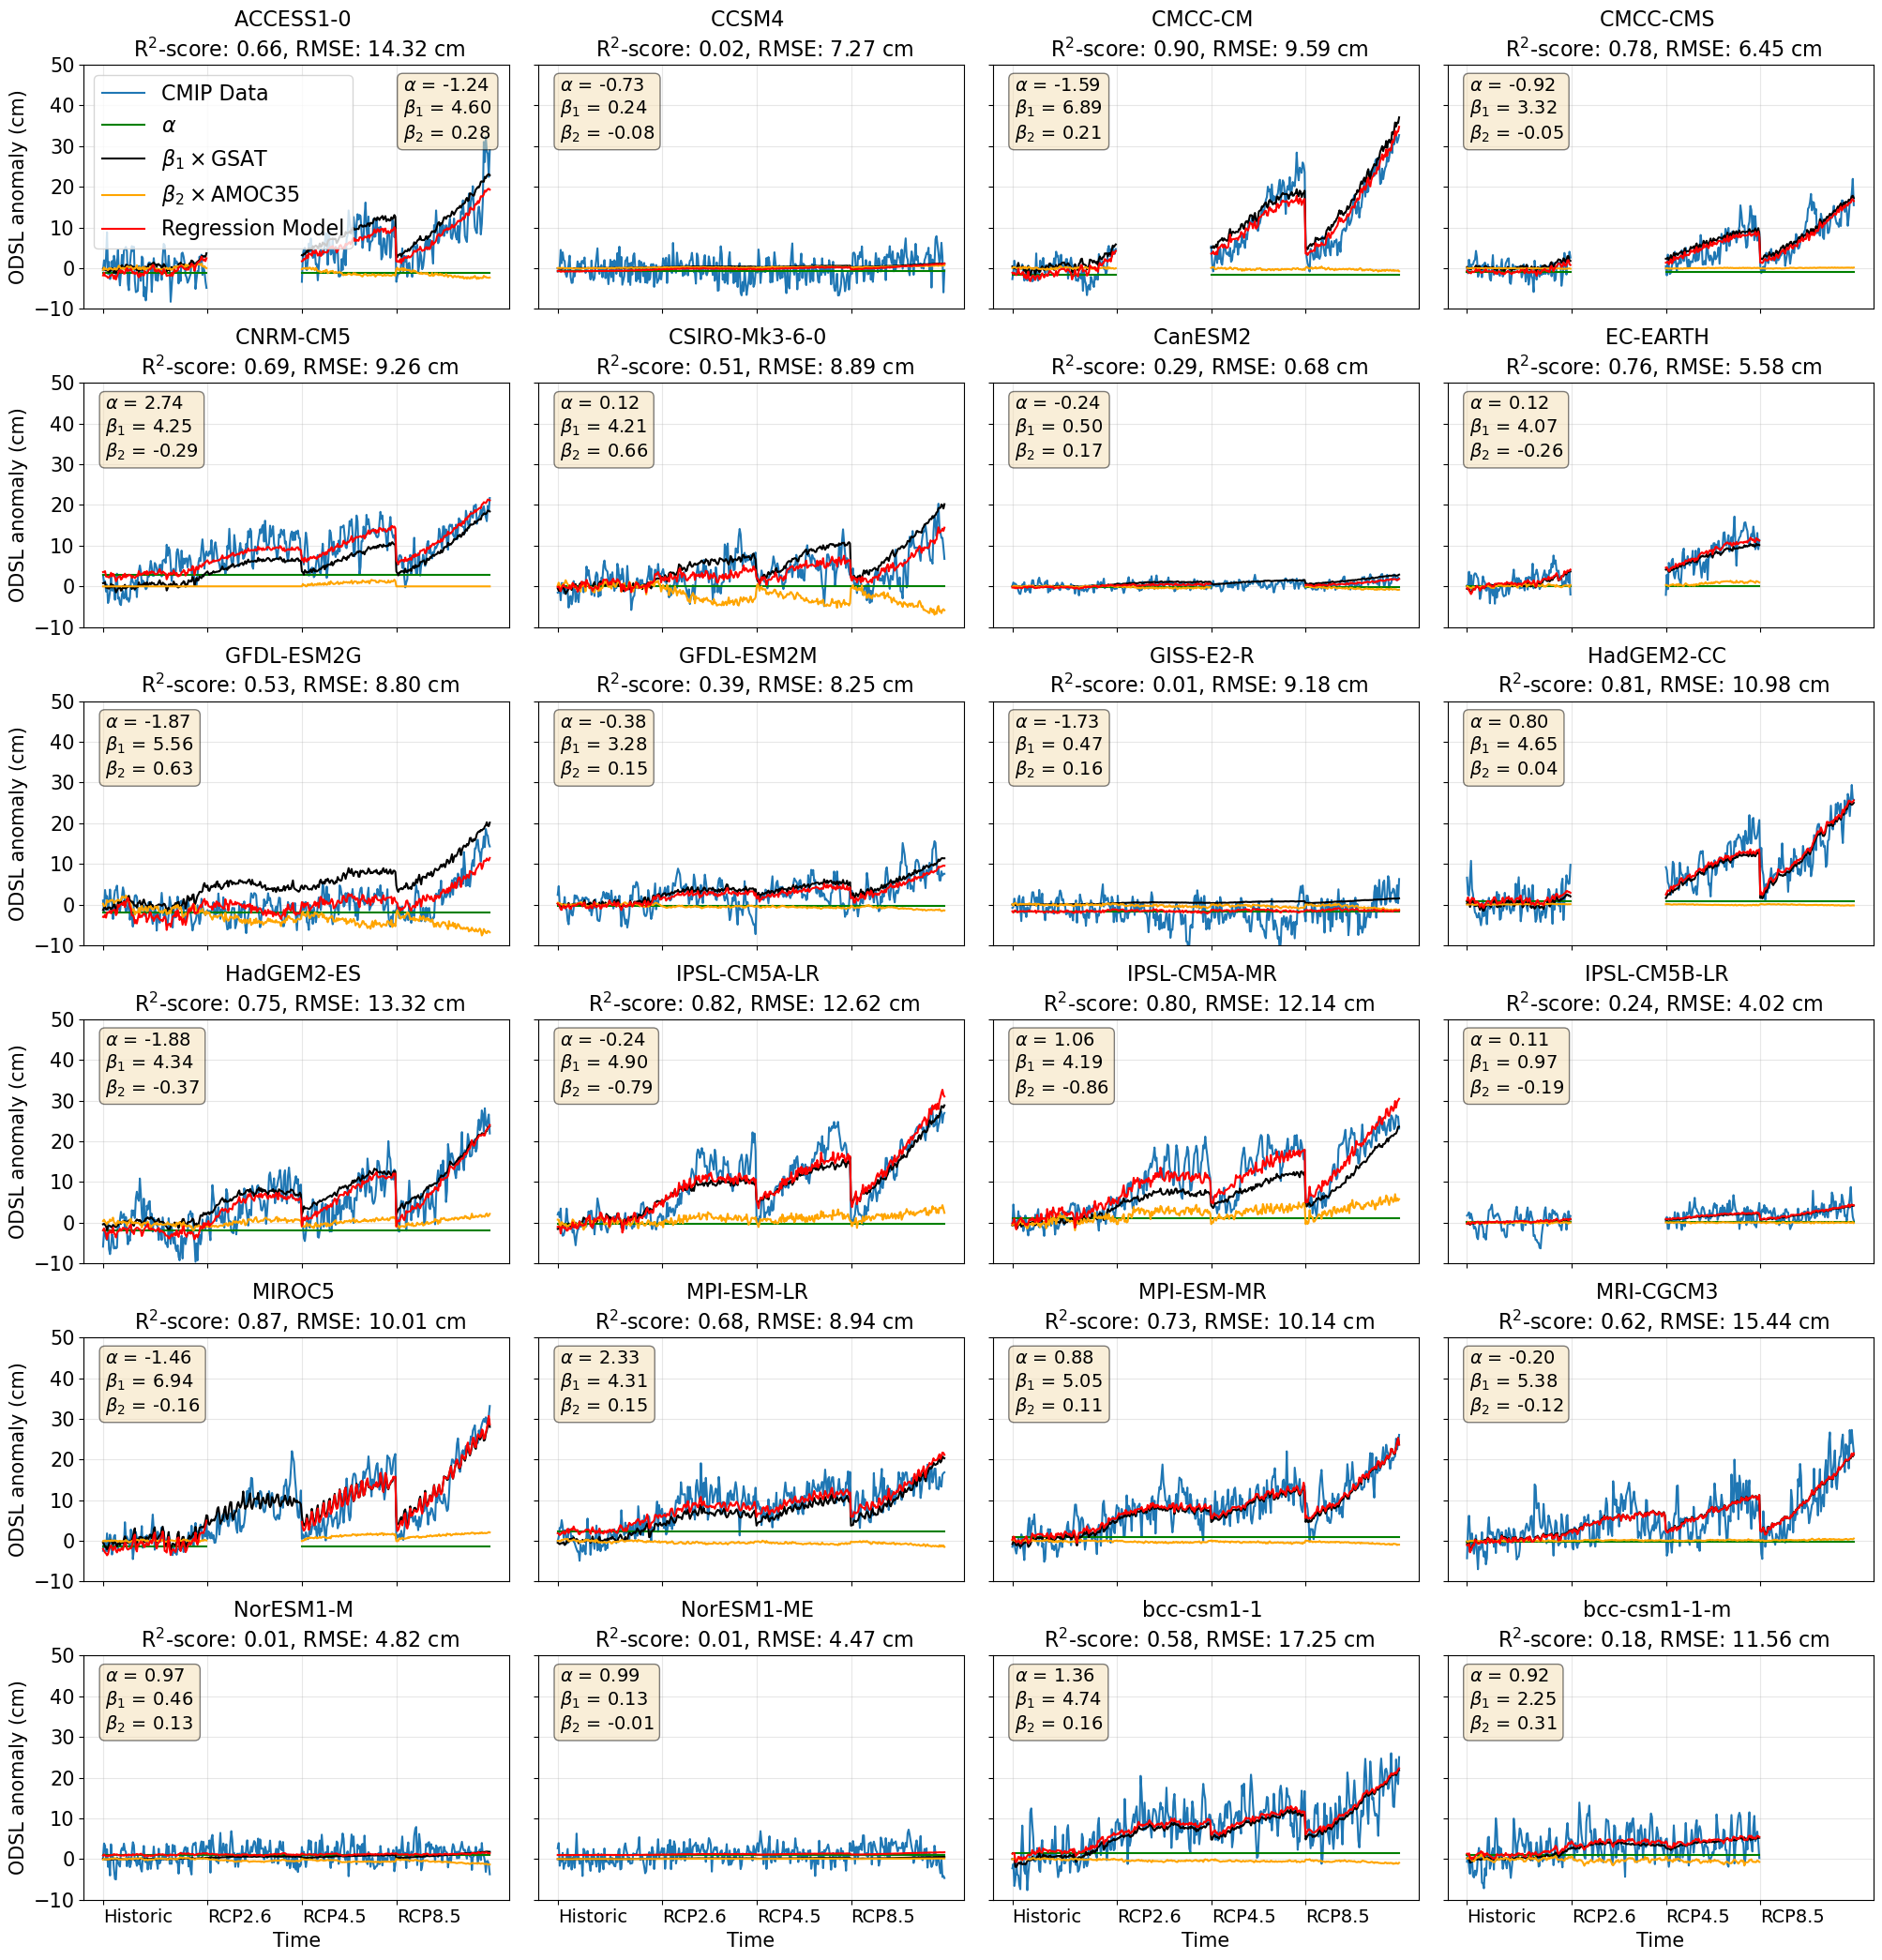

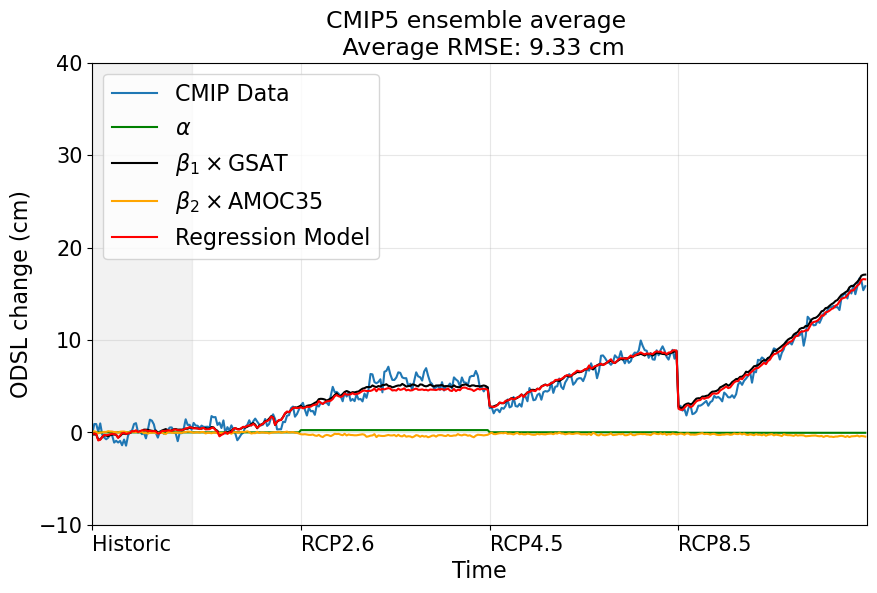

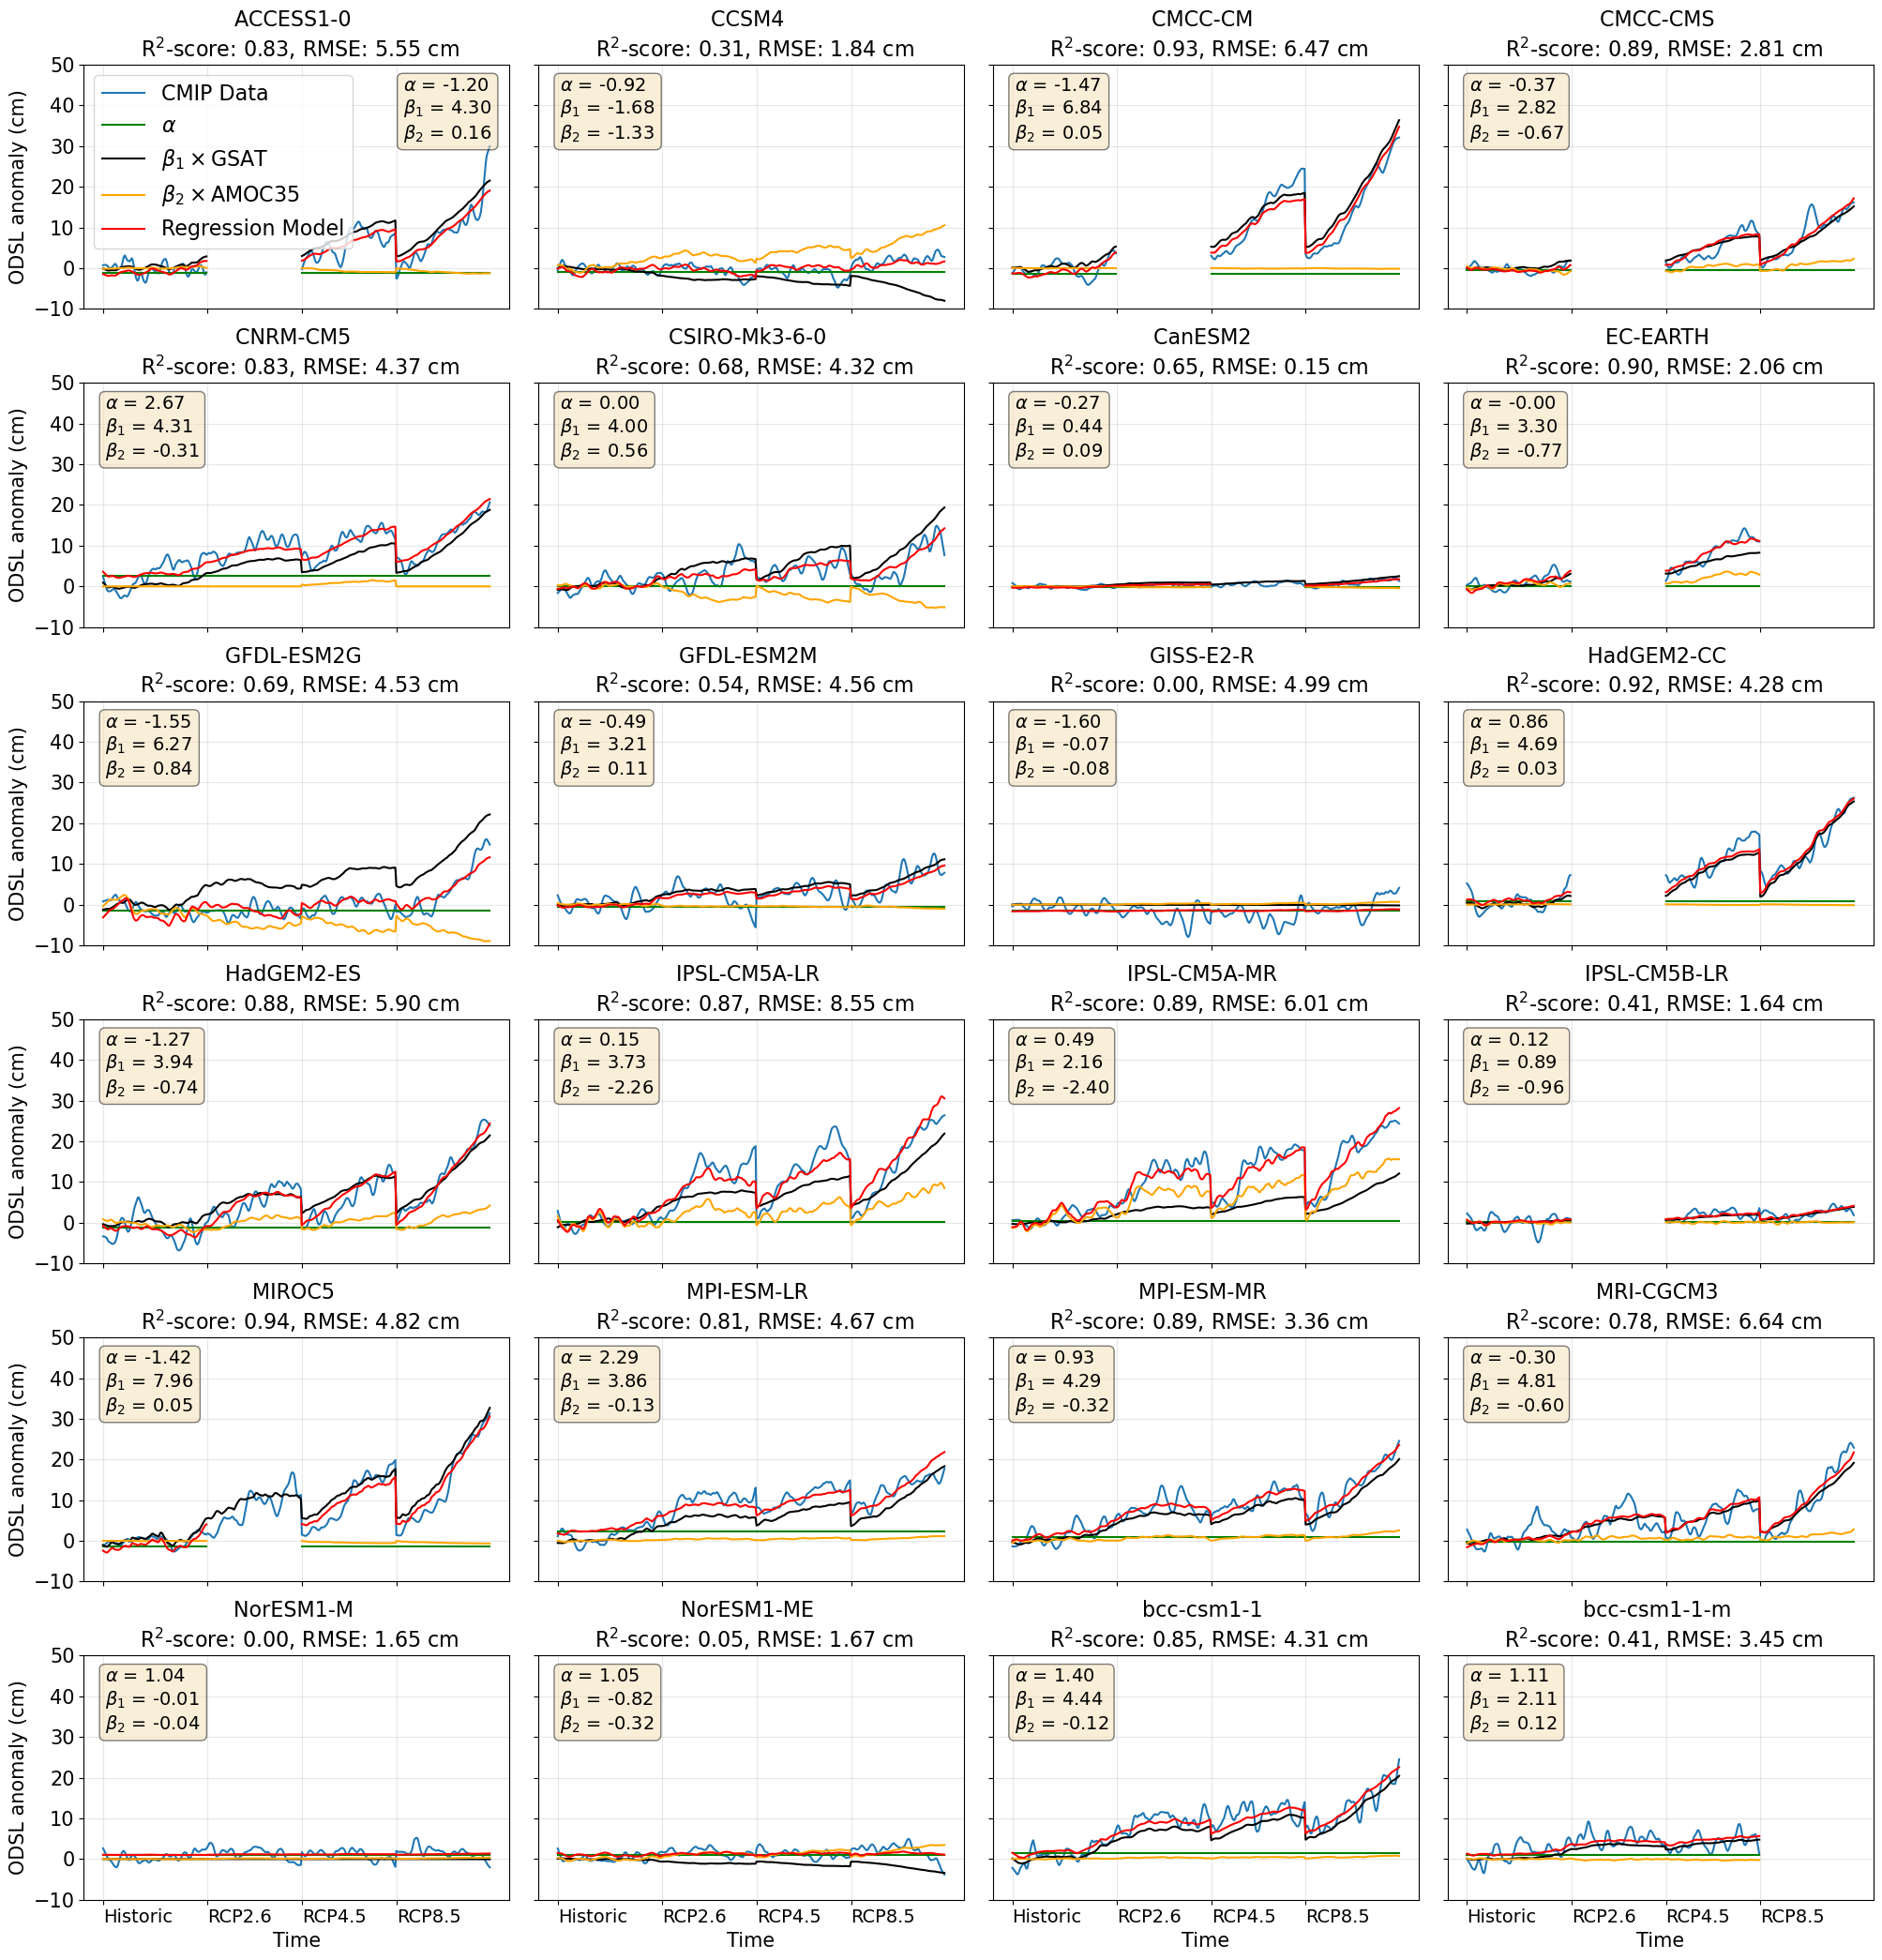

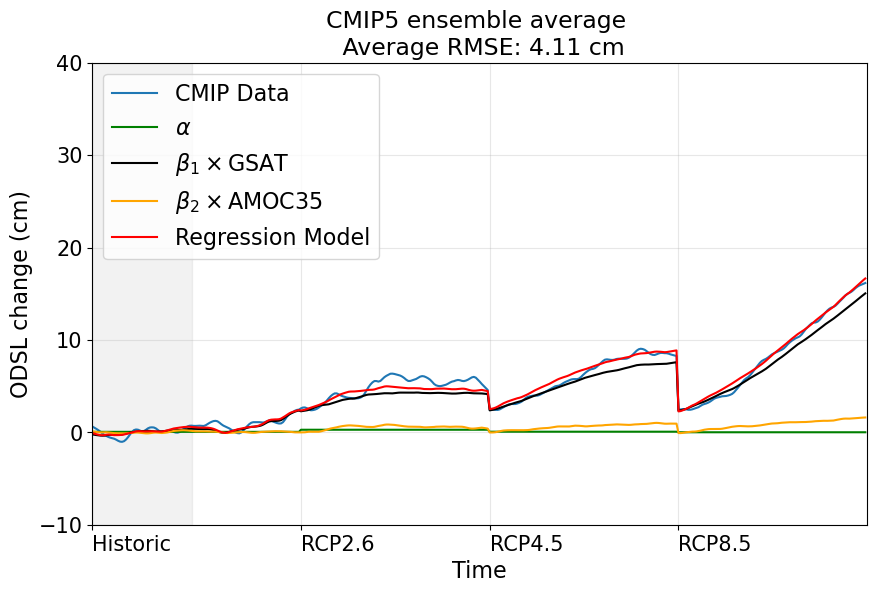

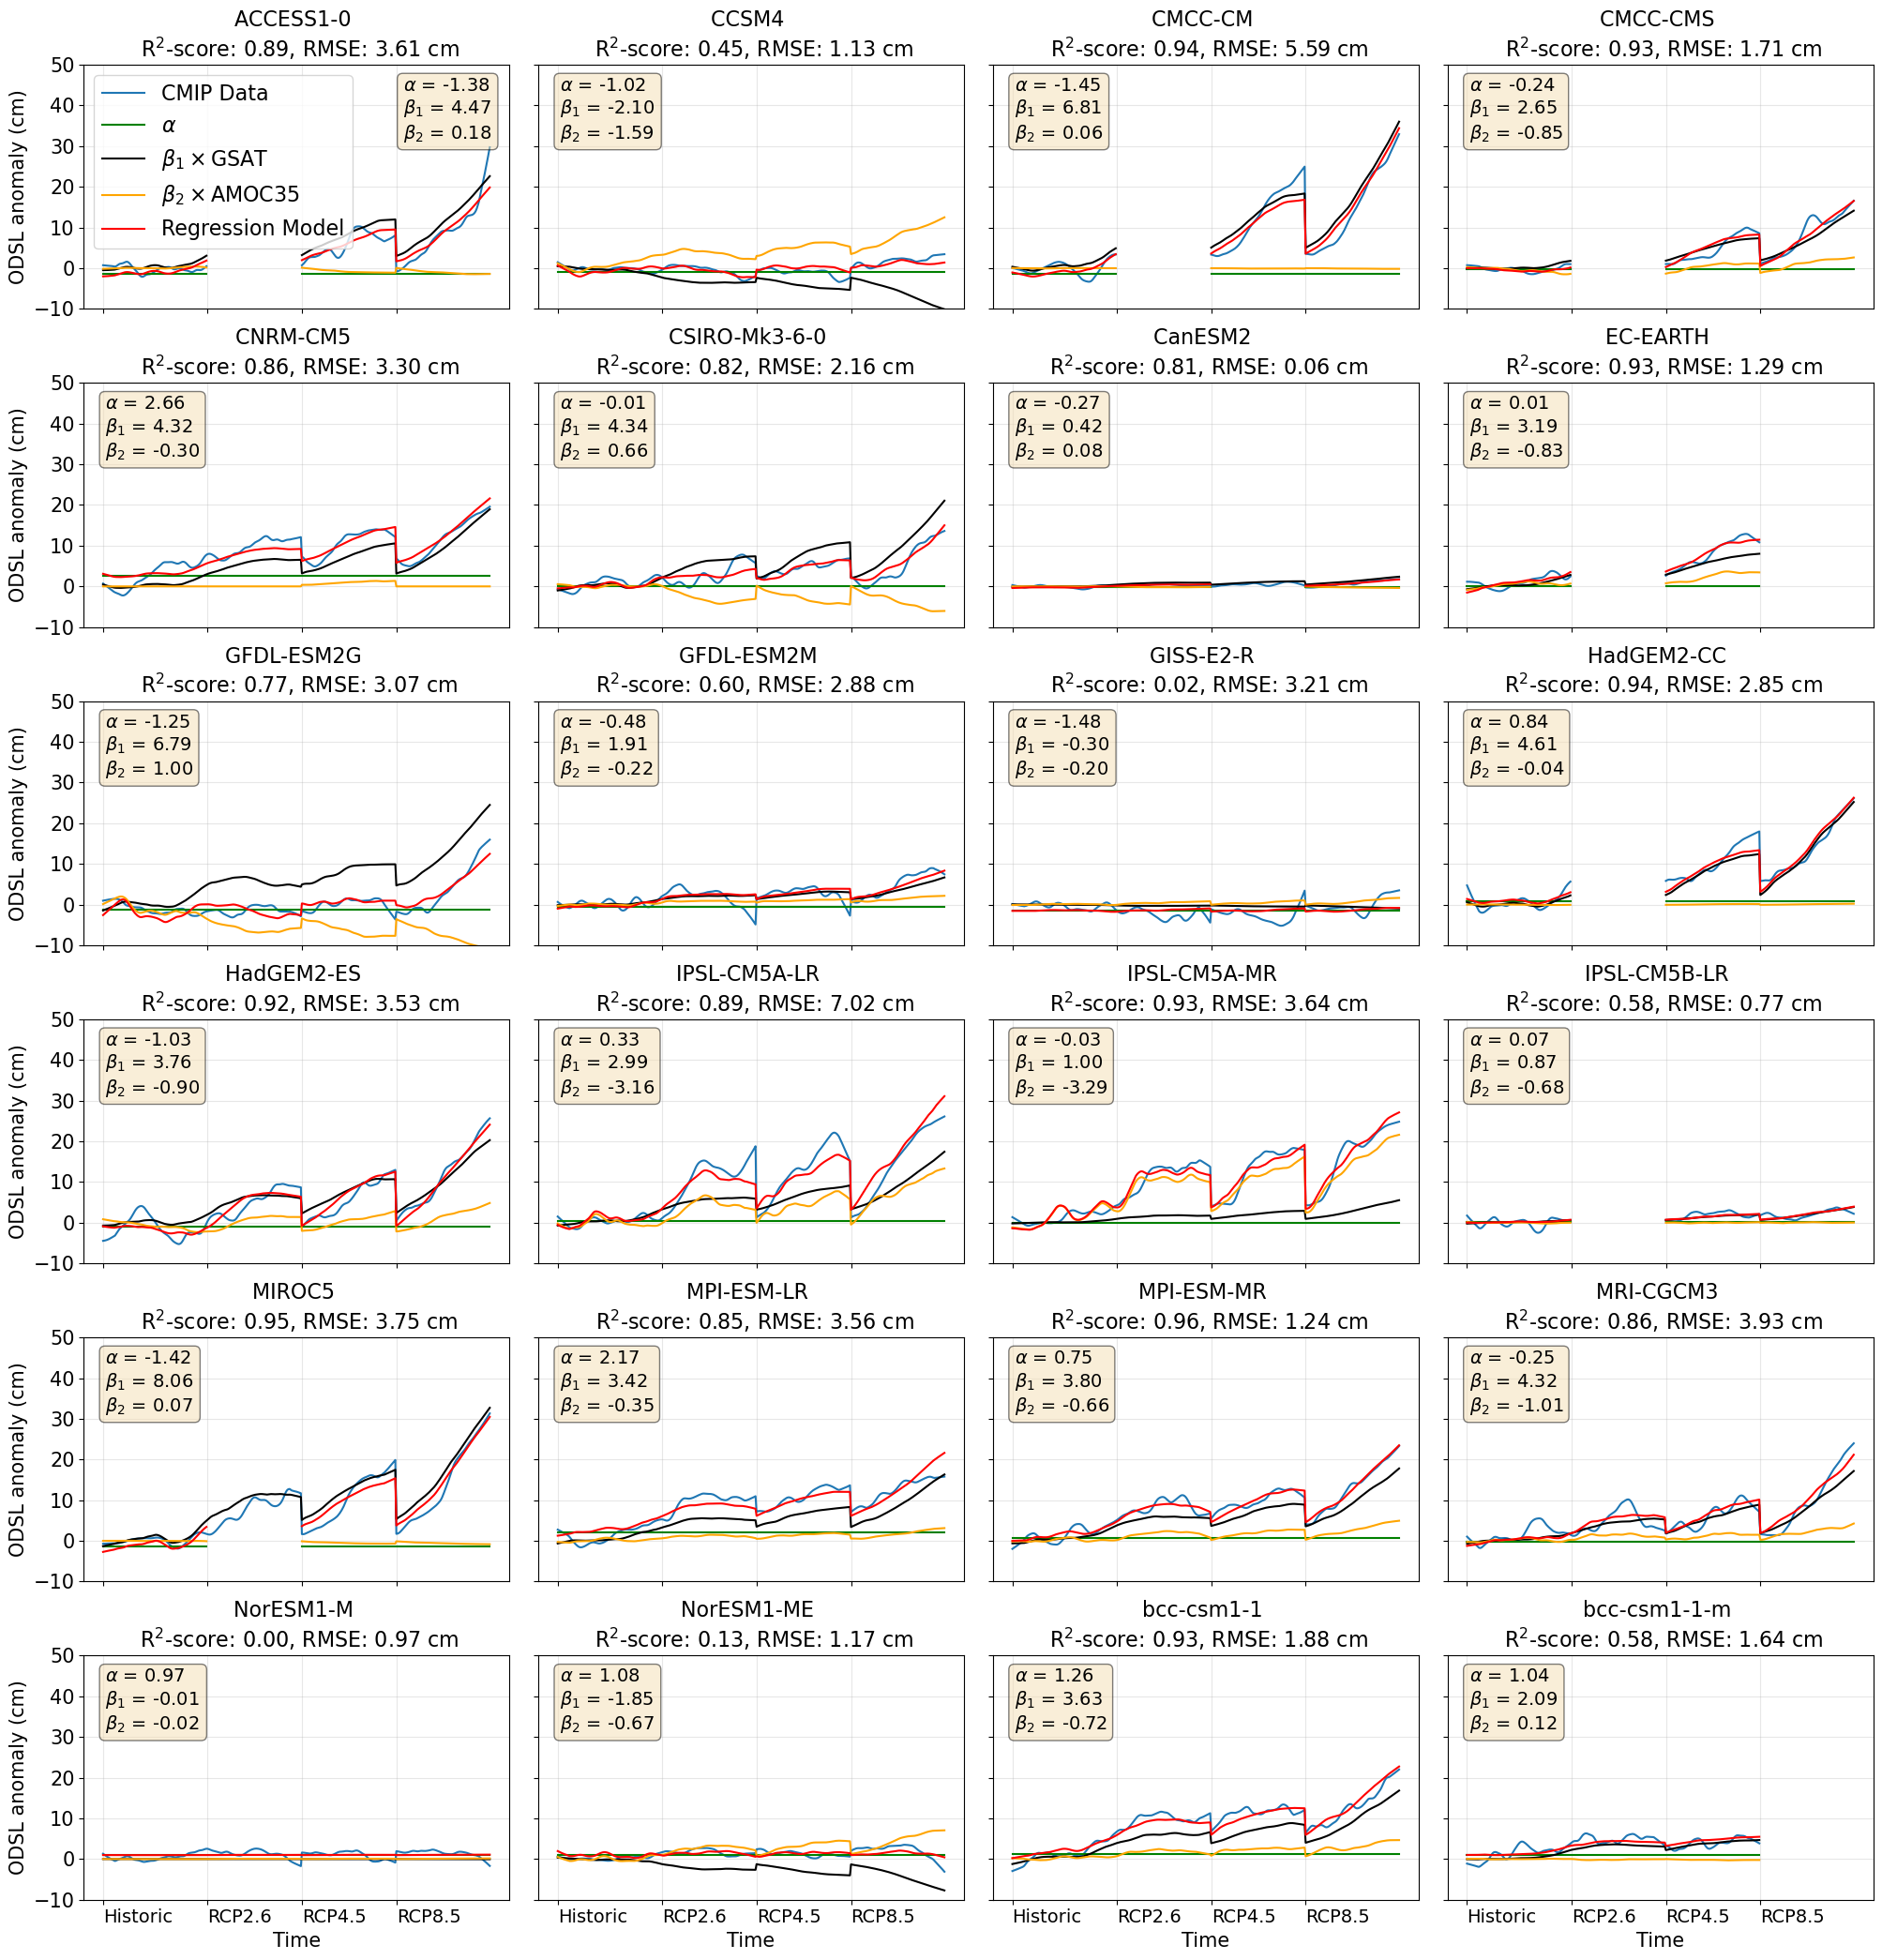

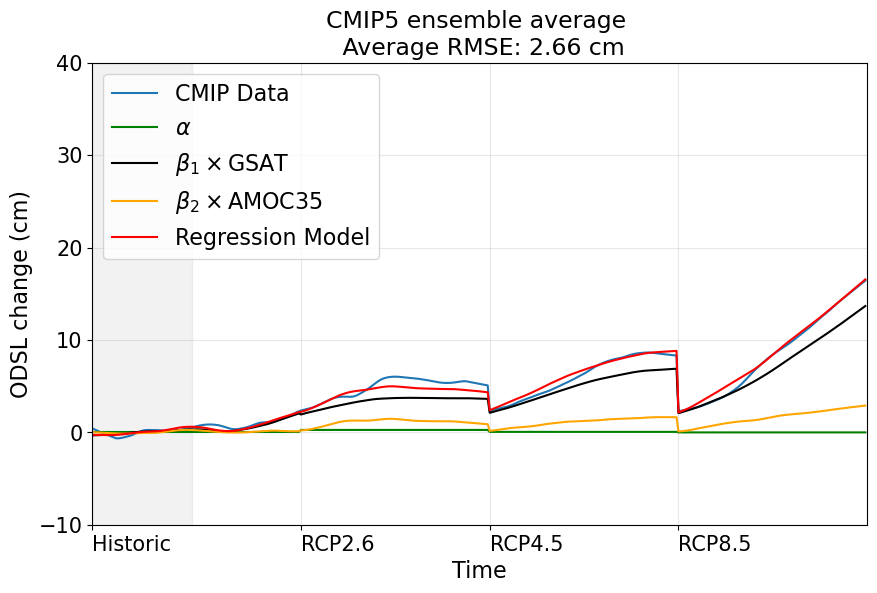

In [10]:
plot_LR_results_multi(CMIP5ds_0yr, 'GSAT', 'AMOC35', 'CMIP5', LR_result_0yr_5, save=None)
plot_LR_results_multi(CMIP5ds_10yr, 'GSAT', 'AMOC35', 'CMIP5', LR_result_10yr_5, save=None)
plot_LR_results_multi(CMIP5ds_25yr, 'GSAT', 'AMOC35', 'CMIP5', LR_result_25yr_5, save=None)

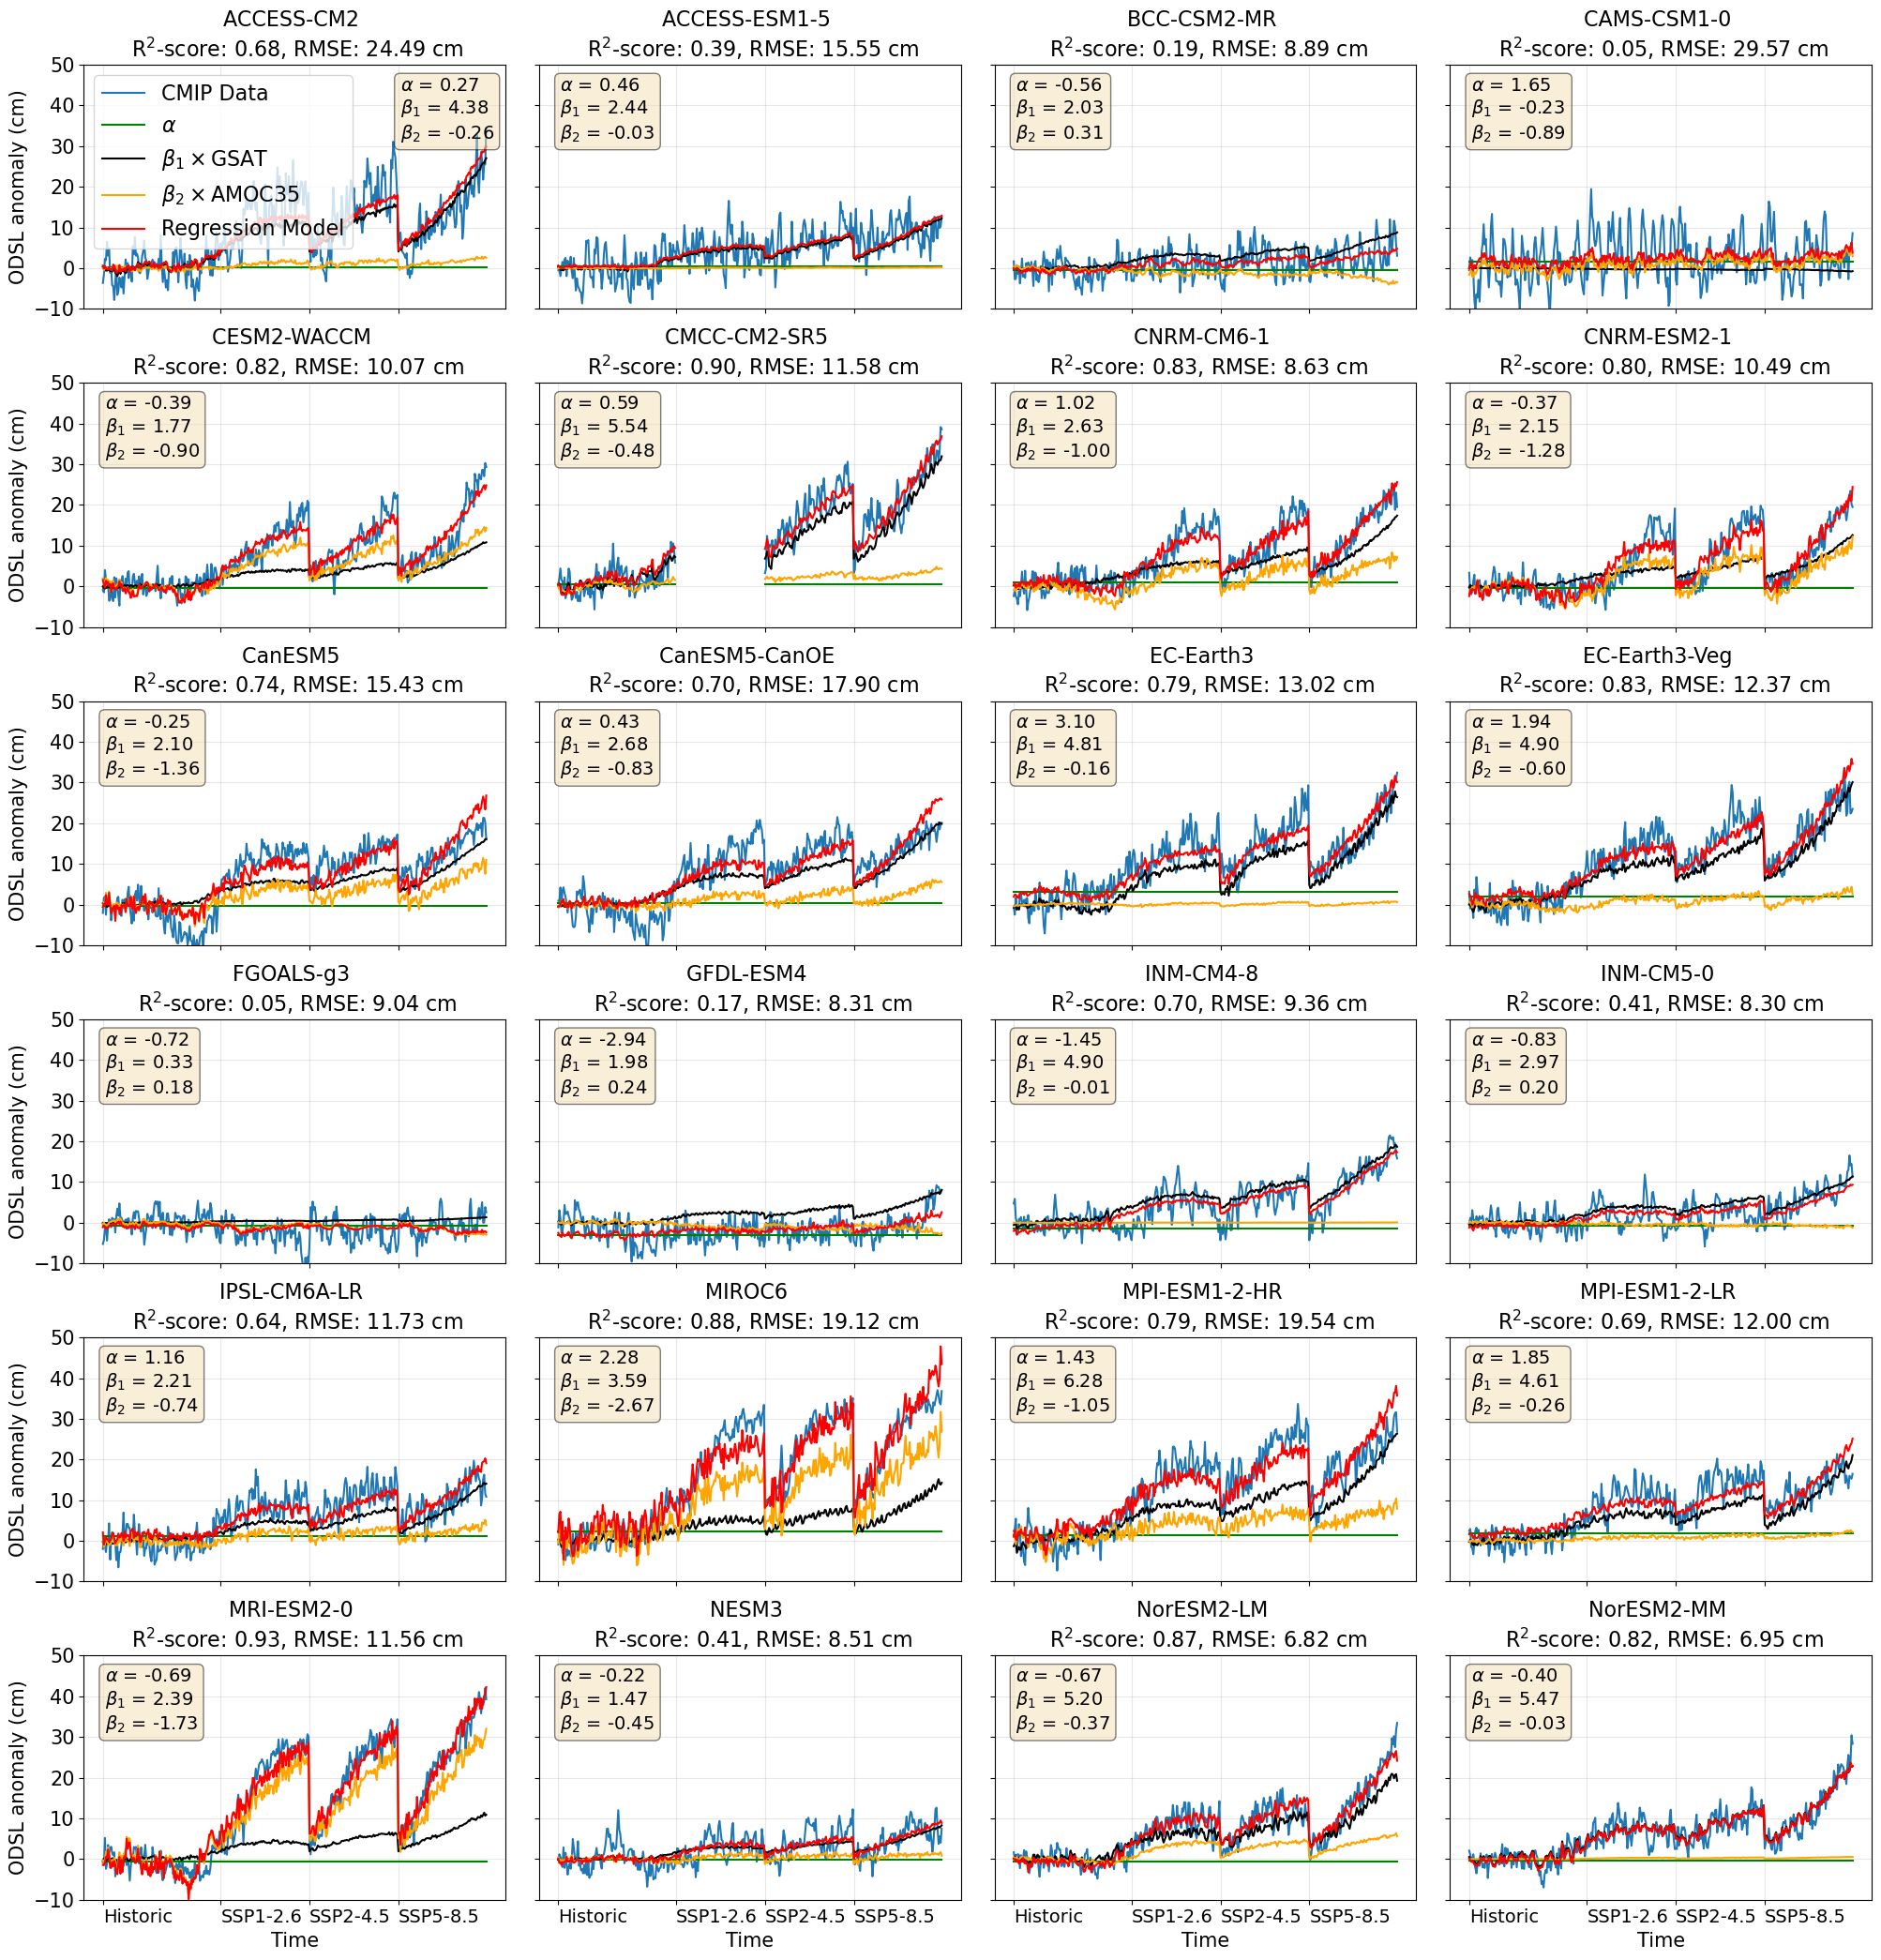

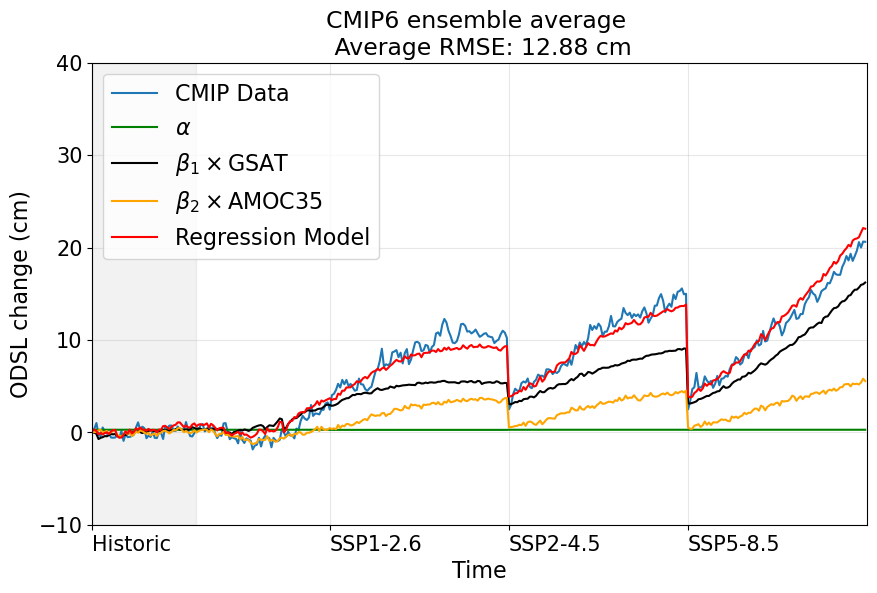

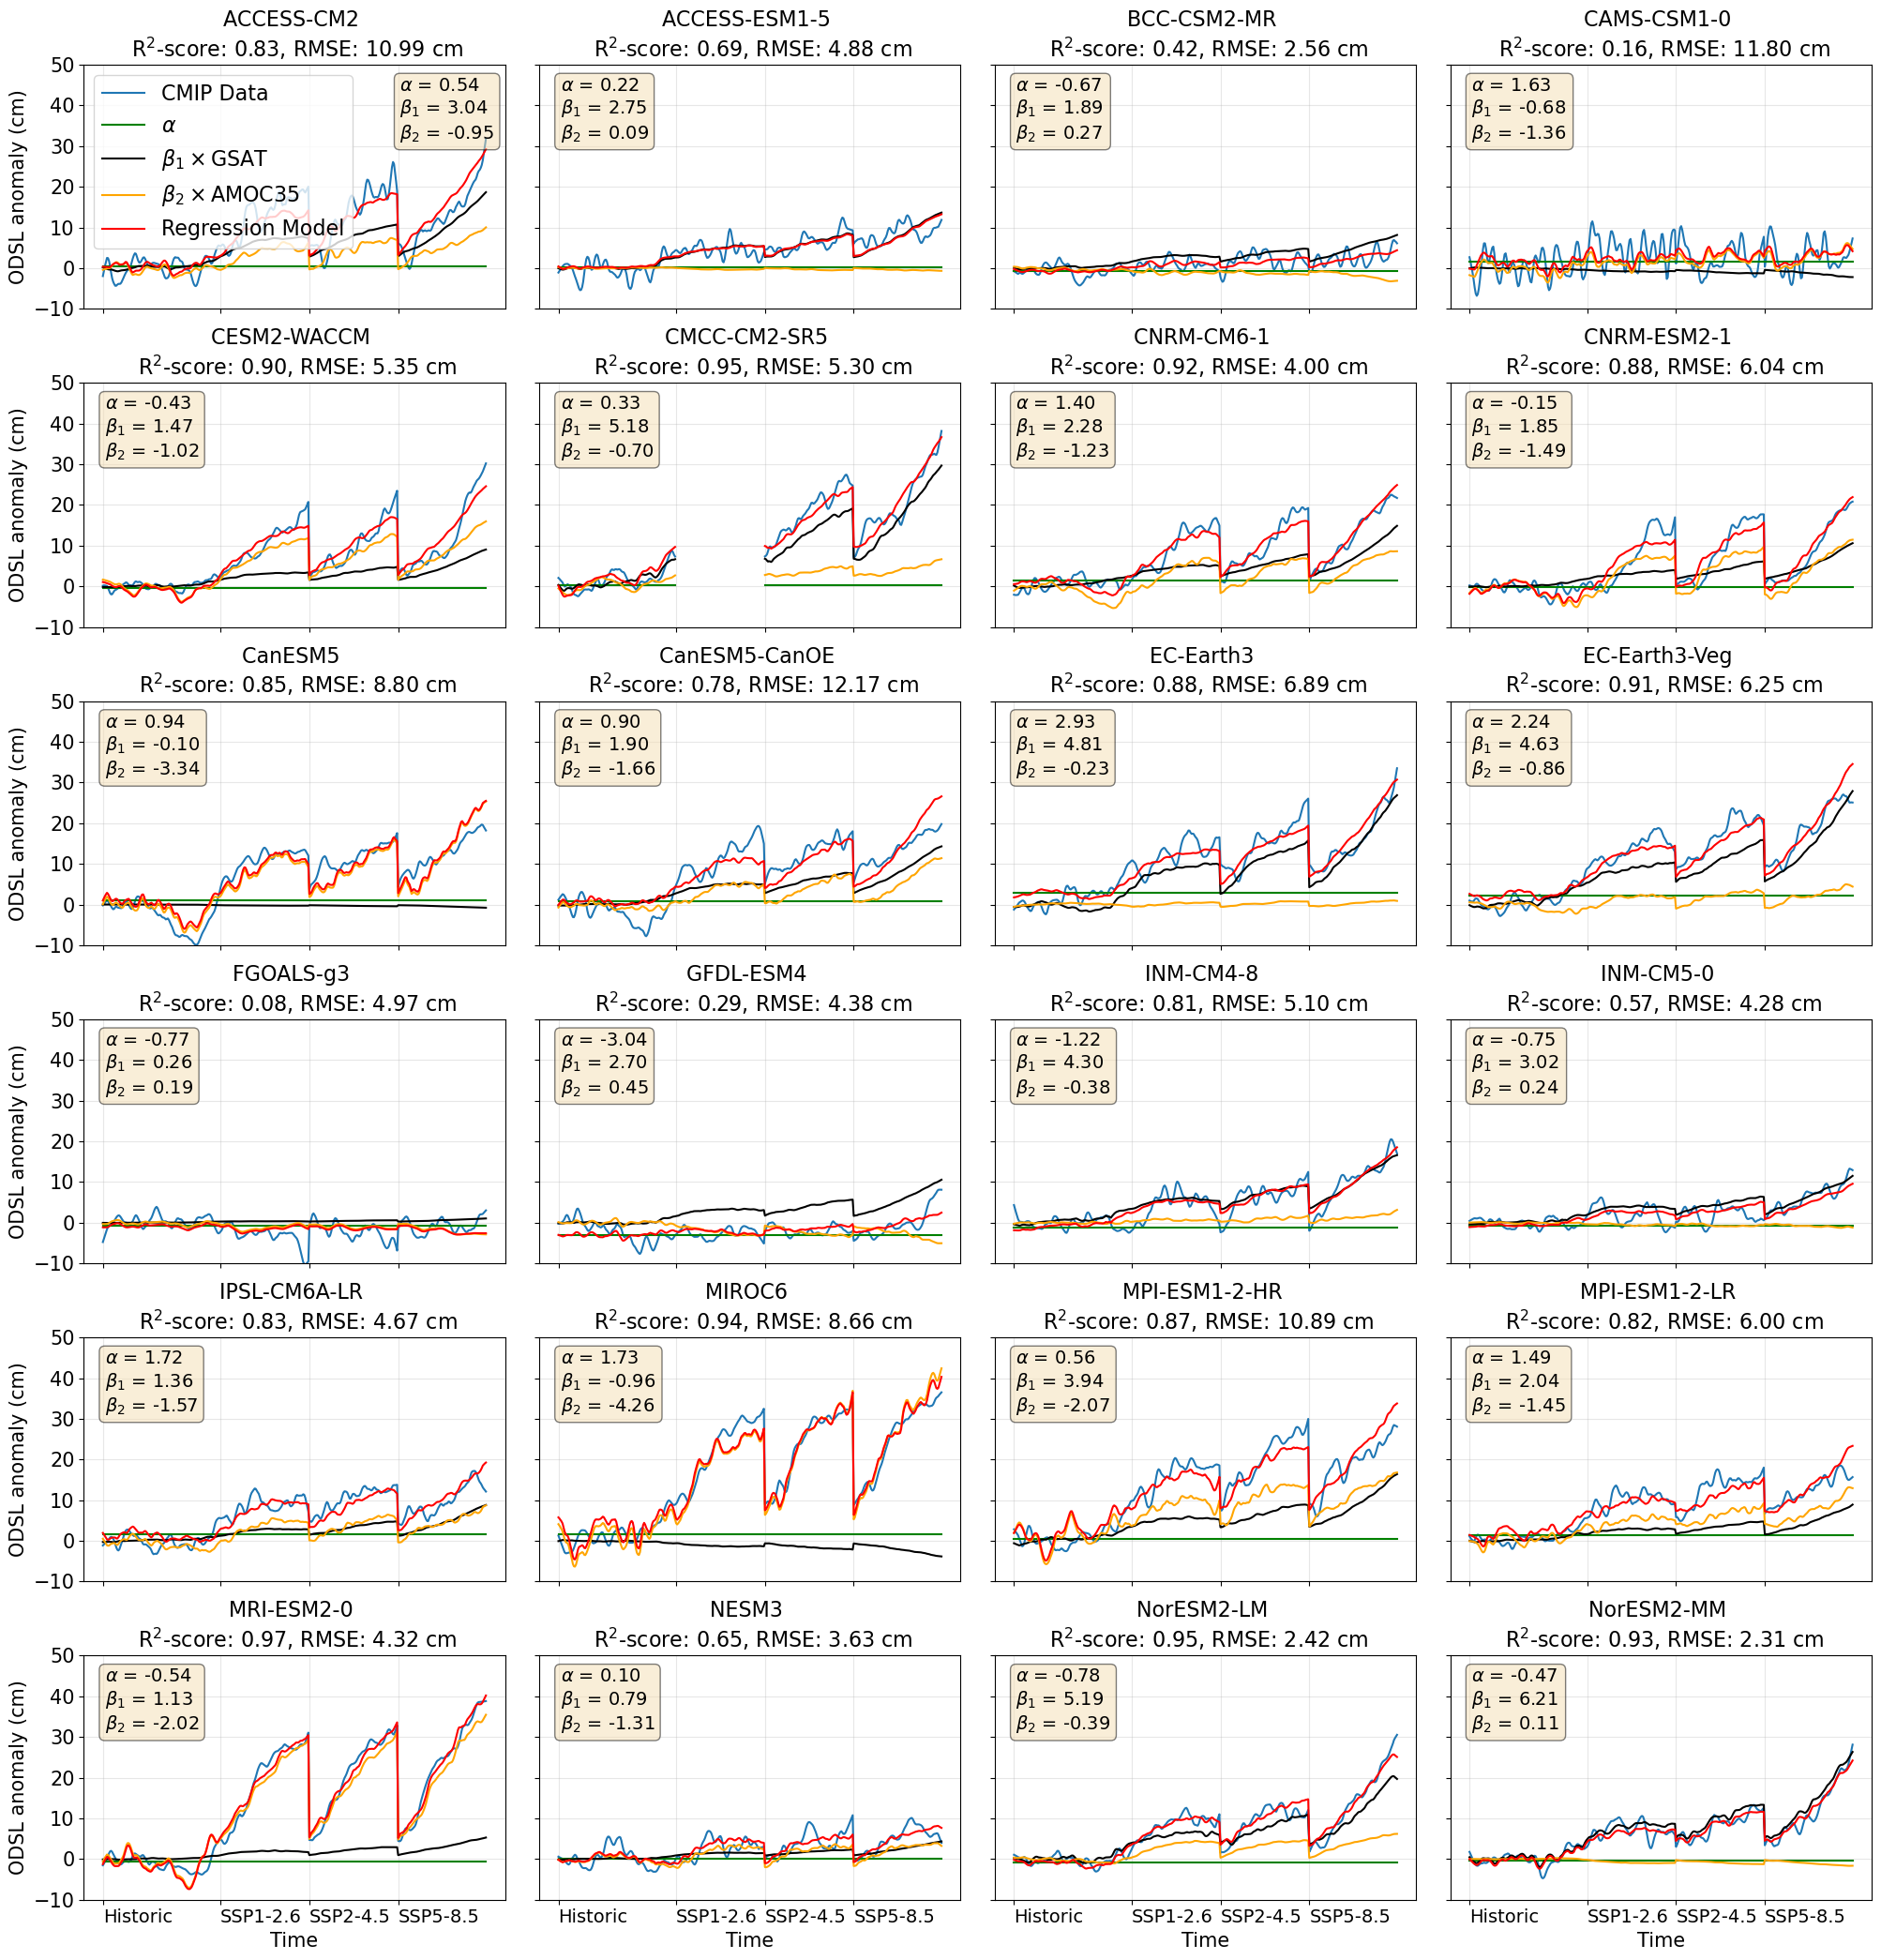

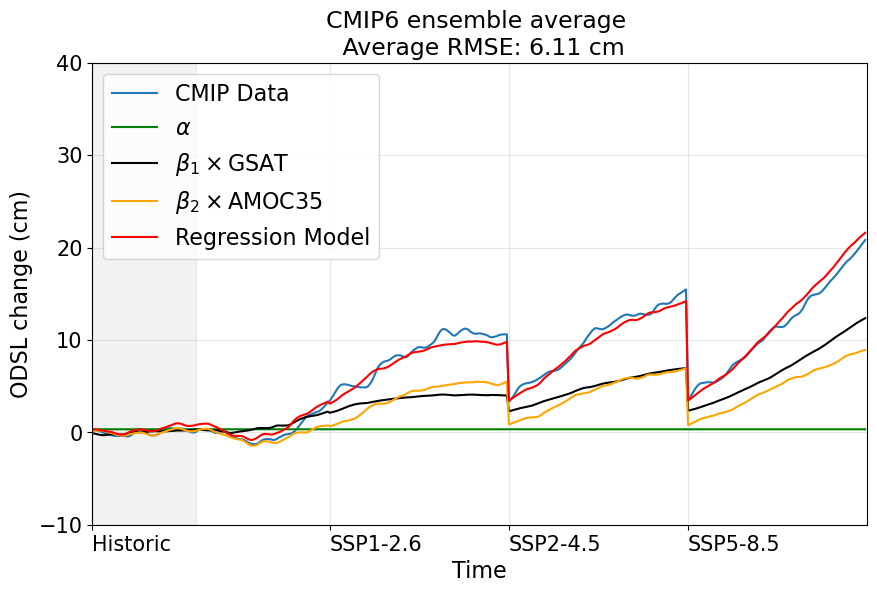

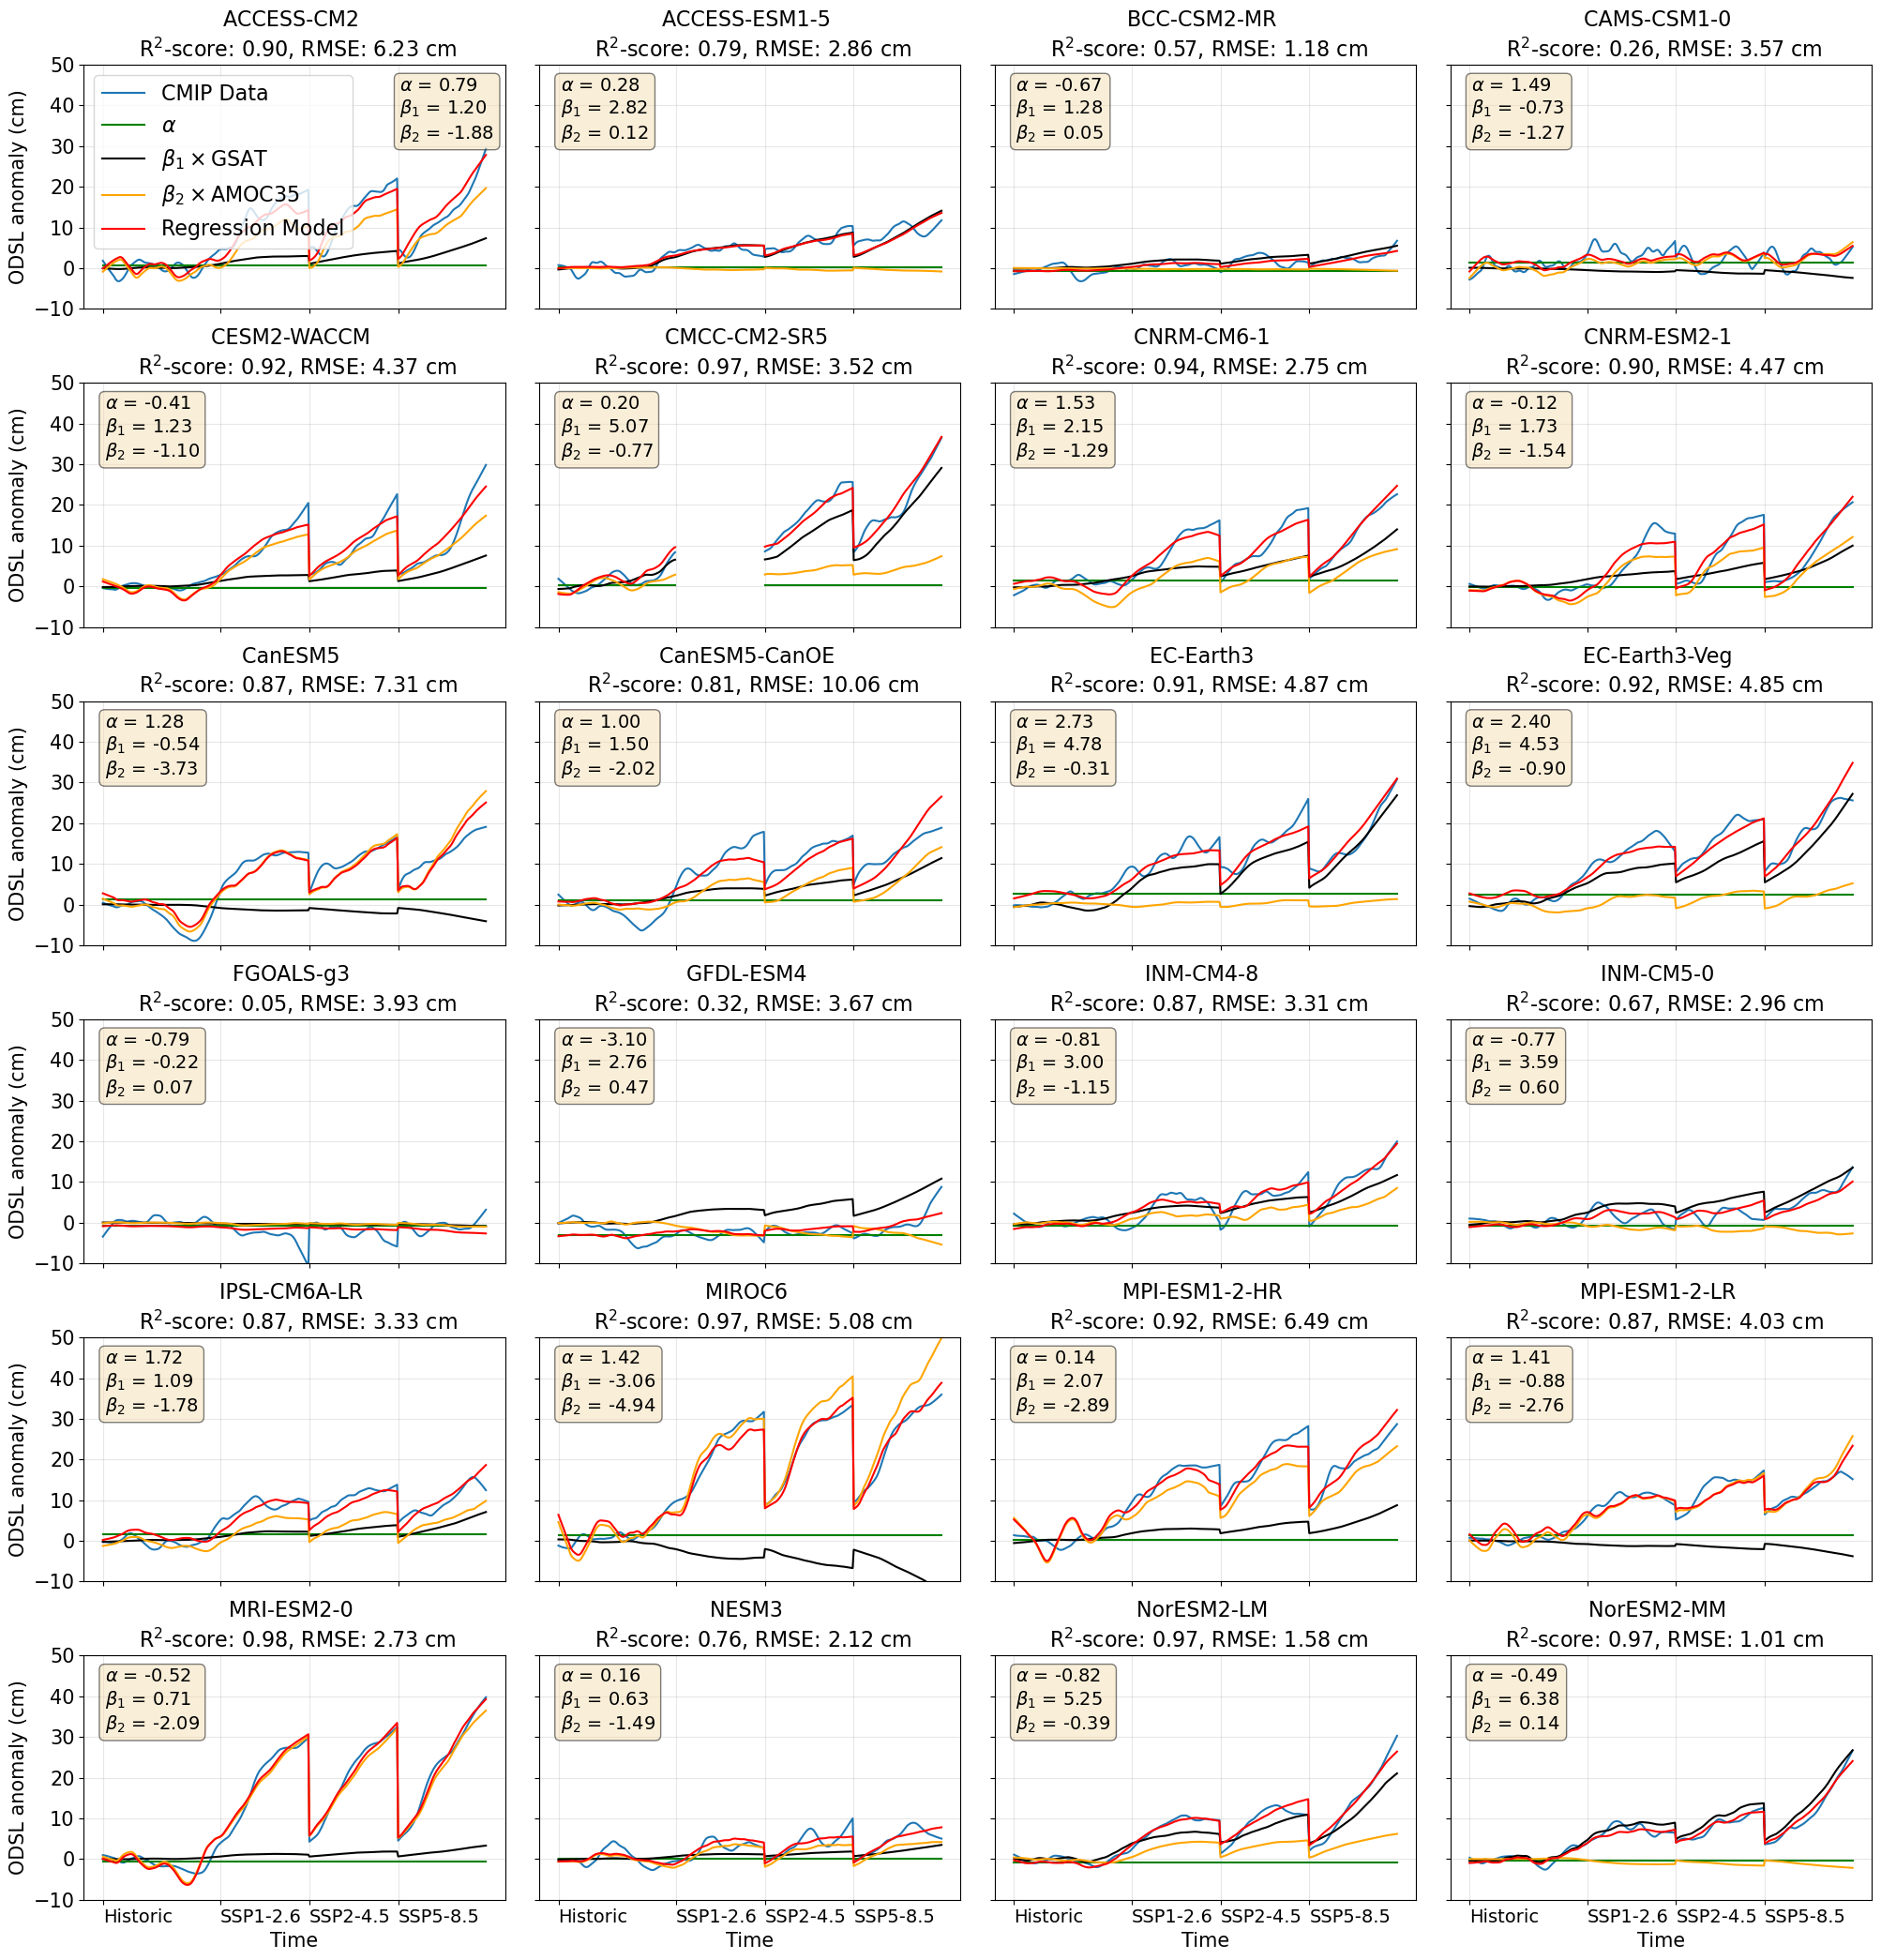

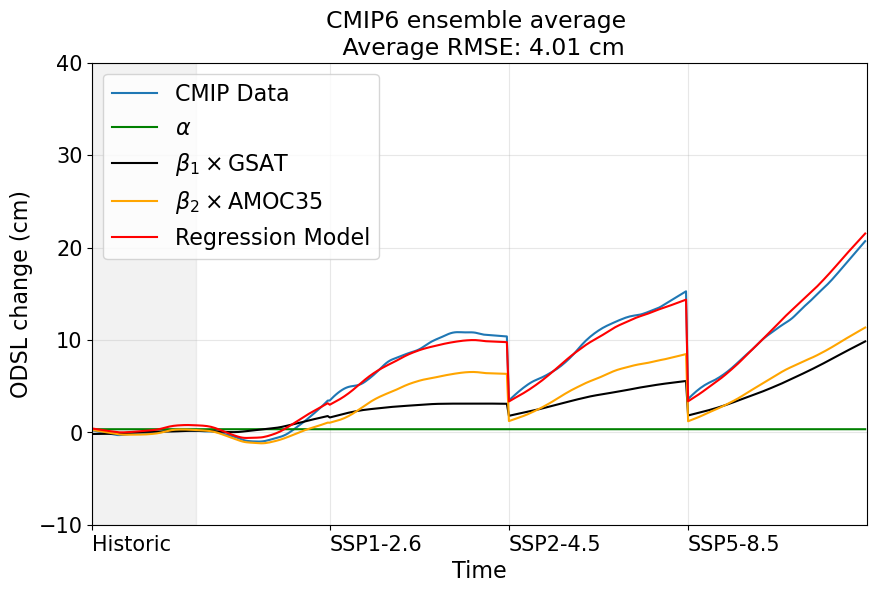

In [11]:
plot_LR_results_multi(CMIP6ds_0yr, 'GSAT', 'AMOC35', 'CMIP6', LR_result_0yr_6, save=None)
plot_LR_results_multi(CMIP6ds_10yr, 'GSAT', 'AMOC35', 'CMIP6', LR_result_10yr_6, save=None)
plot_LR_results_multi(CMIP6ds_25yr, 'GSAT', 'AMOC35', 'CMIP6', LR_result_25yr_6, save=None)